#### 数据集简介


主要包括3类指标: 

- 汽车的各种特性.
- 保险风险评级：(-3, -2, -1, 0, 1, 2, 3).
- 每辆保险车辆年平均相对损失支付.

#### 类别属性
 
- make: 汽车的商标（奥迪，宝马。。。）
- fuel-type: 汽油还是天然气
- aspiration: 涡轮
- num-of-doors: 两门还是四门 
- body-style: 硬顶车、轿车、掀背车、敞篷车
- drive-wheels: 驱动轮
- engine-location: 发动机位置
- engine-type: 发动机类型
- num-of-cylinders: 几个气缸
- fuel-system: 燃油系统

#### 连续指标

- bore:                     continuous from 2.54 to 3.94.
- stroke:                   continuous from 2.07 to 4.17.
- compression-ratio:        continuous from 7 to 23.
- horsepower:               continuous from 48 to 288.
- peak-rpm:                 continuous from 4150 to 6600.
- city-mpg:                 continuous from 13 to 49.
- highway-mpg:              continuous from 16 to 54.
- price:                    continuous from 5118 to 45400.



### 数据读取与分析

In [1]:
# loading packages
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization and missing values
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
import missingno as msno # missing values
%matplotlib inline

# stats
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.metrics import mean_squared_error, r2_score

# machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.ensemble import RandomForestRegressor
seed = 123

# importing data ( ? = missing values)
data = pd.read_csv("Auto-Data.csv", na_values = '?')
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [2]:
data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [3]:
# first glance at the data itself
print("In total: ",data.shape)
data.head(5)

In total:  (205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


一个比较小的数据集:只有 205 条数据, 26个特征

In [4]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### 缺失值处理

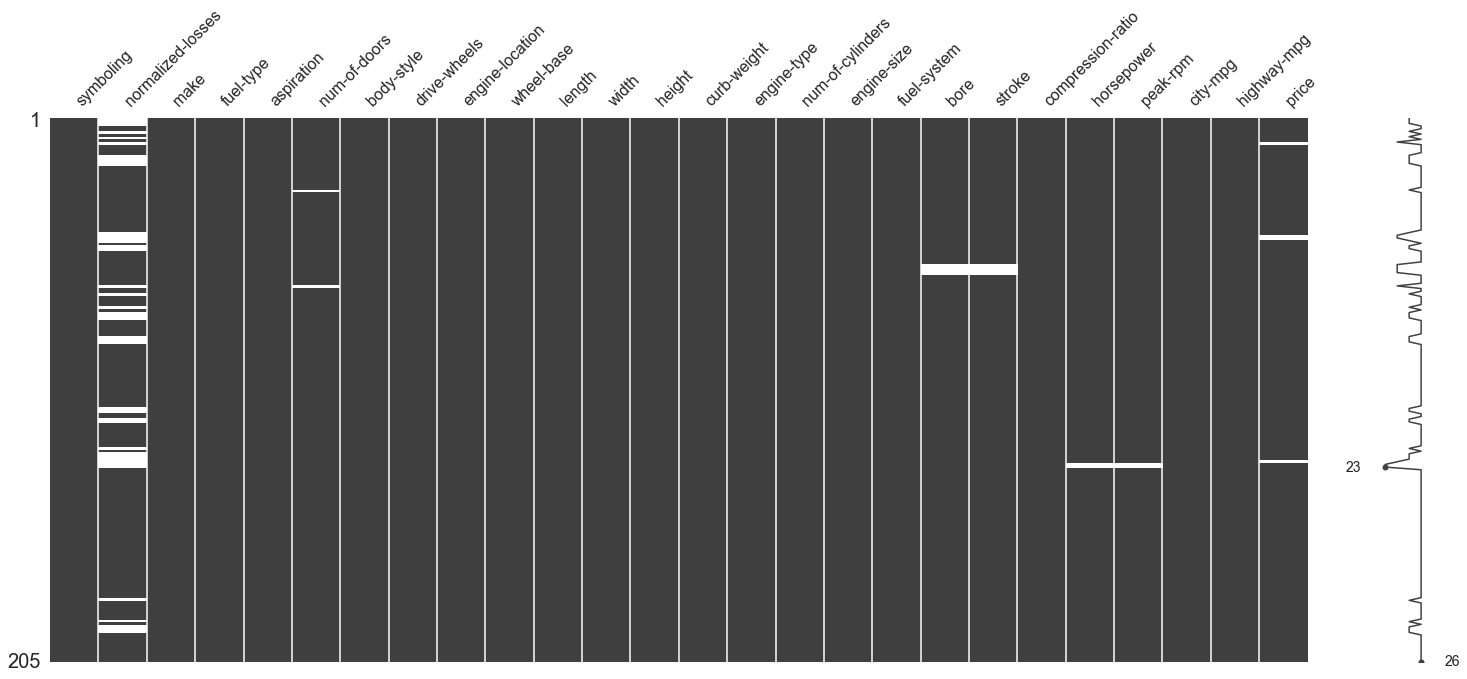

In [5]:
# missing values?
sns.set(style = "ticks")

msno.matrix(data)
#https://github.com/ResidentMario/missingno

`normalized-losses` 缺失比较严重



In [6]:
# missing values in normalied-losses
data[pd.isnull(data['normalized-losses'])].head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0


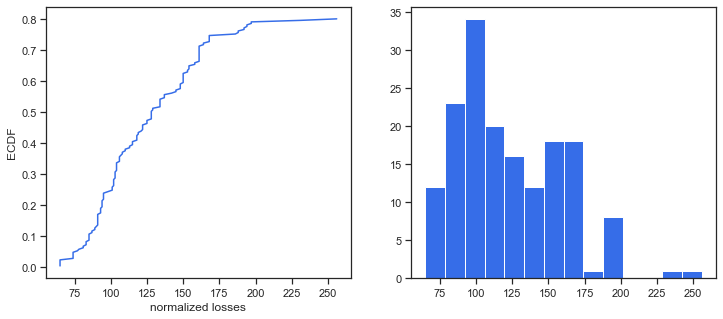

In [7]:
sns.set(style = "ticks")
plt.figure(figsize = (12, 5)) 
c = '#366DE8'

# ECDF
plt.subplot(121)
cdf = ECDF(data['normalized-losses'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('normalized losses'); plt.ylabel('ECDF');

# overall distribution
plt.subplot(122)
plt.hist(data['normalized-losses'].dropna(), 
         bins = int(np.sqrt(len(data['normalized-losses']))),
         color = c);

可以发现 __80% 的 normalized losses 是低于200__ 并且绝大多数低于125. 

一个基本的想法就是用中位数来进行填充，但是我们得来想一想，这个特征跟哪些因素可能有关呢？应该是保险的情况吧，所以我们可以分组来进行填充这样会更精确一些。

首先来看一下对于不同保险情况的统计指标:

In [8]:
data.groupby('symboling')['normalized-losses'].describe()

,count,mean,std,min,25%,50%,75%,max
symboling,,,,,,,,
-2,3.0,103.000000,0.000000,103.0,103.00,103.0,103.0,103.0
-1,20.0,85.600000,18.528499,65.0,71.75,91.5,95.0,137.0
0,48.0,113.166667,32.510773,77.0,91.00,102.0,120.5,192.0
1,47.0,128.574468,28.478630,74.0,105.50,125.0,148.0,231.0
2,29.0,125.689655,30.167513,83.0,94.00,134.0,137.0,192.0
3,17.0,168.647059,30.636867,142.0,150.00,150.0,194.0,256.0


In [9]:
# replacing
data = data.dropna(subset = ['price', 'bore', 'stroke', 'peak-rpm', 'horsepower', 'num-of-doors'])
data['normalized-losses'] = data.groupby('symboling')['normalized-losses'].transform(lambda x: x.fillna(x.mean()))

print('In total:', data.shape)
data.head()

In total: (193, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,174.384615,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,174.384615,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,128.152174,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### 特征相关性

In [10]:
cormatrix = data.corr()
cormatrix

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.593658,-0.536516,-0.363194,-0.247741,-0.517803,-0.231086,-0.068327,-0.144785,-0.010884,-0.175160,0.069491,0.227899,0.017639,0.085775,-0.084835
normalized-losses,0.593658,1.000000,-0.167286,-0.038857,0.034178,-0.445925,0.085758,0.152544,0.032765,0.057834,-0.149620,0.277376,0.245497,-0.245313,-0.189911,0.160602
wheel-base,-0.536516,-0.167286,1.000000,0.879307,0.818465,0.591239,0.782173,0.568375,0.495957,0.174225,0.252234,0.377040,-0.350823,-0.504499,-0.571771,0.584951
length,-0.363194,-0.038857,0.879307,1.000000,0.857368,0.491050,0.882694,0.686998,0.606373,0.121888,0.156061,0.589650,-0.276144,-0.702143,-0.731264,0.695928
width,-0.247741,0.034178,0.818465,0.857368,1.000000,0.310640,0.867640,0.739903,0.541633,0.188733,0.188631,0.621532,-0.247612,-0.657153,-0.702009,0.754649
height,-0.517803,-0.445925,0.591239,0.491050,0.310640,1.000000,0.305837,0.026906,0.182445,-0.054338,0.253934,-0.081730,-0.257334,-0.111166,-0.159850,0.136234
curb-weight,-0.231086,0.085758,0.782173,0.882694,0.867640,0.305837,1.000000,0.857188,0.645070,0.175349,0.161030,0.762154,-0.278528,-0.777763,-0.818104,0.835368
engine-size,-0.068327,0.152544,0.568375,0.686998,0.739903,0.026906,0.857188,1.000000,0.581854,0.214518,0.025257,0.845325,-0.217769,-0.716378,-0.737531,0.888778
bore,-0.144785,0.032765,0.495957,0.606373,0.541633,0.182445,0.645070,0.581854,1.000000,-0.065038,-0.004172,0.572972,-0.273766,-0.601369,-0.608804,0.546295
stroke,-0.010884,0.057834,0.174225,0.121888,0.188733,-0.054338,0.175349,0.214518,-0.065038,1.000000,0.199600,0.102913,-0.068420,-0.031248,-0.040274,0.096007


In [11]:
cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T  #返回函数的上三角矩阵，把对角线上的置0，让他们不是最高的。
cormatrix

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,0.0,0.593658,-0.536516,-0.363194,-0.247741,-0.517803,-0.231086,-0.068327,-0.144785,-0.010884,-0.175160,0.069491,0.227899,0.017639,0.085775,-0.084835
normalized-losses,0.0,0.000000,-0.167286,-0.038857,0.034178,-0.445925,0.085758,0.152544,0.032765,0.057834,-0.149620,0.277376,0.245497,-0.245313,-0.189911,0.160602
wheel-base,-0.0,-0.000000,0.000000,0.879307,0.818465,0.591239,0.782173,0.568375,0.495957,0.174225,0.252234,0.377040,-0.350823,-0.504499,-0.571771,0.584951
length,-0.0,-0.000000,0.000000,0.000000,0.857368,0.491050,0.882694,0.686998,0.606373,0.121888,0.156061,0.589650,-0.276144,-0.702143,-0.731264,0.695928
width,-0.0,0.000000,0.000000,0.000000,0.000000,0.310640,0.867640,0.739903,0.541633,0.188733,0.188631,0.621532,-0.247612,-0.657153,-0.702009,0.754649
height,-0.0,-0.000000,0.000000,0.000000,0.000000,0.000000,0.305837,0.026906,0.182445,-0.054338,0.253934,-0.081730,-0.257334,-0.111166,-0.159850,0.136234
curb-weight,-0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.857188,0.645070,0.175349,0.161030,0.762154,-0.278528,-0.777763,-0.818104,0.835368
engine-size,-0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.581854,0.214518,0.025257,0.845325,-0.217769,-0.716378,-0.737531,0.888778
bore,-0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.065038,-0.004172,0.572972,-0.273766,-0.601369,-0.608804,0.546295
stroke,-0.0,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.199600,0.102913,-0.068420,-0.031248,-0.040274,0.096007


In [12]:
cormatrix = cormatrix.stack()
cormatrix

symboling          symboling            0.000000
                   normalized-losses    0.593658
                   wheel-base          -0.536516
                   length              -0.363194
                   width               -0.247741
                   height              -0.517803
                   curb-weight         -0.231086
                   engine-size         -0.068327
                   bore                -0.144785
                   stroke              -0.010884
                   compression-ratio   -0.175160
                   horsepower           0.069491
                   peak-rpm             0.227899
                   city-mpg             0.017639
                   highway-mpg          0.085775
                   price               -0.084835
normalized-losses  symboling            0.000000
                   normalized-losses    0.000000
                   wheel-base          -0.167286
                   length              -0.038857
                   w

In [13]:
cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
cormatrix

,level_0,level_1,0
0,city-mpg,highway-mpg,0.971975
1,engine-size,price,0.888778
2,length,curb-weight,0.882694
3,wheel-base,length,0.879307
4,width,curb-weight,0.867640
5,length,width,0.857368
6,curb-weight,engine-size,0.857188
7,engine-size,horsepower,0.845325
8,curb-weight,price,0.835368
9,horsepower,city-mpg,-0.833615


In [14]:
cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
cormatrix.head(10)

,FirstVariable,SecondVariable,Correlation
0,city-mpg,highway-mpg,0.971975
1,engine-size,price,0.888778
2,length,curb-weight,0.882694
3,wheel-base,length,0.879307
4,width,curb-weight,0.867640
5,length,width,0.857368
6,curb-weight,engine-size,0.857188
7,engine-size,horsepower,0.845325
8,curb-weight,price,0.835368
9,horsepower,city-mpg,-0.833615


 __`city_mpg` 和 `highway-mpg` 这哥俩差不多是一个意思了__. 对于这个长宽高，他们应该存在某种配对关系，给他们合体吧！

In [15]:
data['volume'] = data.length * data.width * data.height

data.drop(['width', 'length', 'height', 
           'curb-weight', 'city-mpg'], 
          axis = 1, # 1 for columns
          inplace = True) 

In [16]:
# new variables
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'highway-mpg', 'price', 'volume'],
      dtype='object')

也可以直接画出来

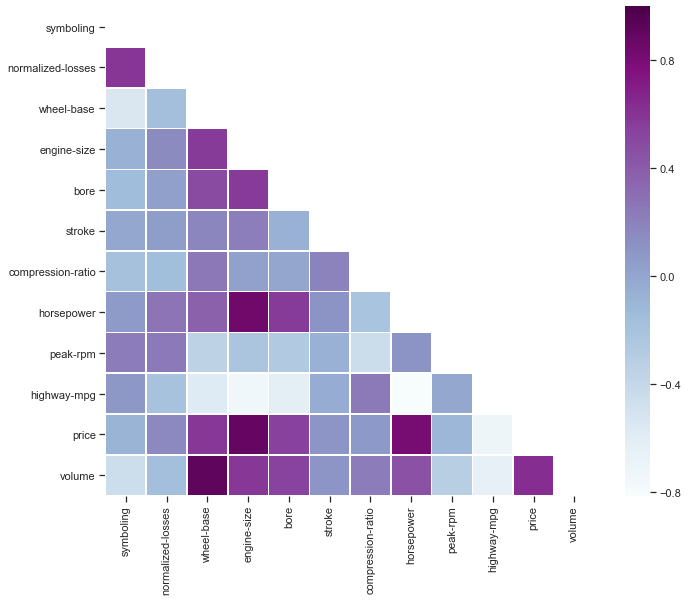

In [17]:
# Compute the correlation matrix 
corr_all = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

看起来 `price` 跟这几个的相关程度比较大 `wheel-base`,`enginine-size`, `bore`,`horsepower`. 

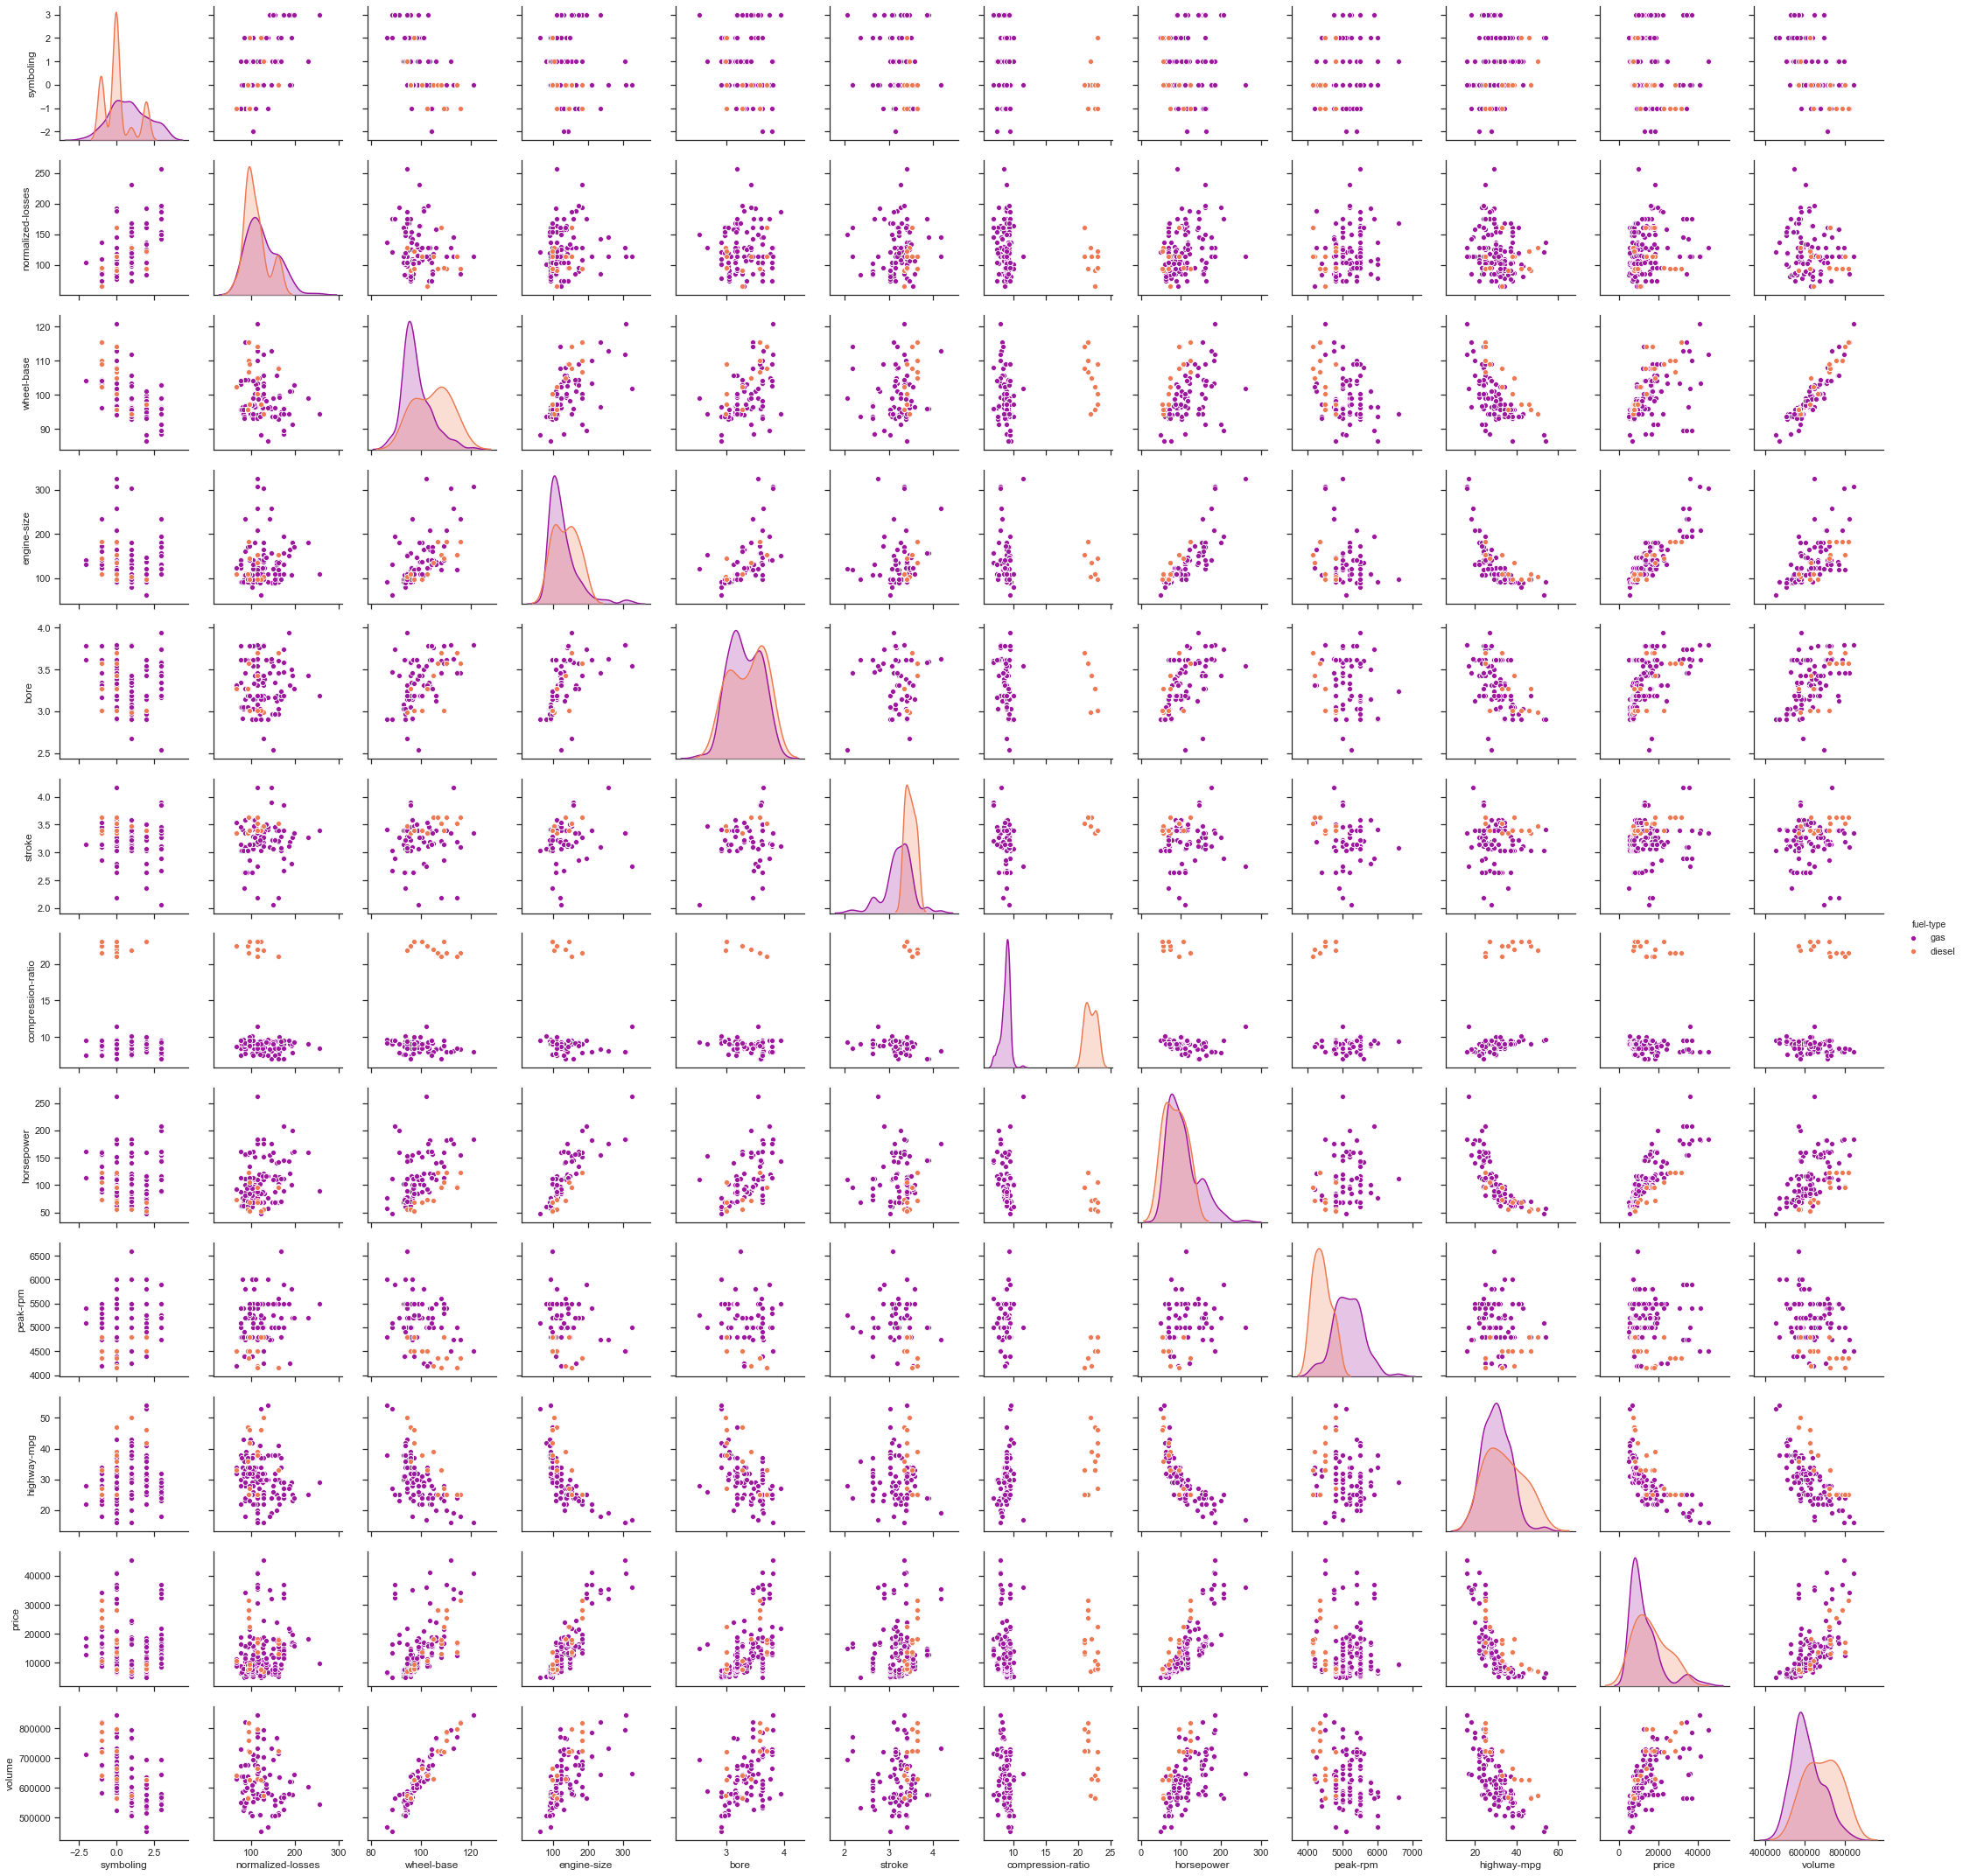

In [18]:
sns.pairplot(data, hue = 'fuel-type', palette = 'plasma')

让我们仔细看看价格和马力变量之间的关系

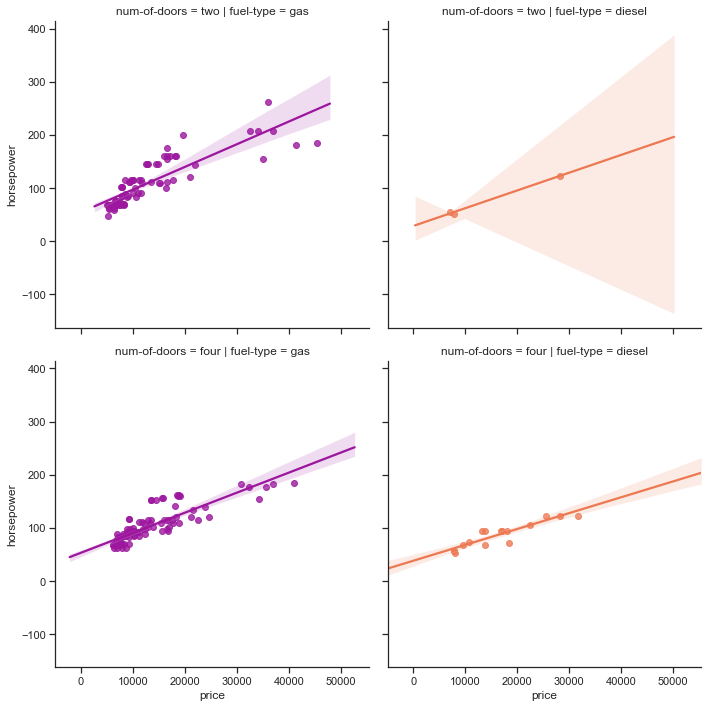

In [19]:
sns.lmplot('price', 'horsepower', data, 
           hue = 'fuel-type', col = 'fuel-type',  row = 'num-of-doors', 
           palette = 'plasma', 
           fit_reg = True);

事实上，对于燃料的类型和数门变量，我们看到，在一辆汽车马力的增加与价格成比例的增加相关的各个层面

### 预处理

如果一个特性的方差比其他的要大得多，那么它可能支配目标函数，使估计者不能像预期的那样正确地从其他特性中学习。这就是为什么我们需要首先对数据进行缩放。

对连续值进行标准化

In [20]:
# target and features
target = data.price

regressors = [x for x in data.columns if x not in ['price']]
features = data.loc[:, regressors]

num = ['symboling', 'normalized-losses', 'volume', 'horsepower', 'wheel-base',
       'bore', 'stroke','compression-ratio', 'peak-rpm']

# scale the data
standard_scaler = StandardScaler()
features[num] = standard_scaler.fit_transform(features[num])

# glimpse
features.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,volume
0,1.78685,1.477685,alfa-romero,gas,std,two,convertible,rwd,front,-1.682379,...,four,130,mpfi,0.513027,-1.808186,-0.288273,0.198569,-0.213359,27,-1.168294
1,1.78685,1.477685,alfa-romero,gas,std,two,convertible,rwd,front,-1.682379,...,four,130,mpfi,0.513027,-1.808186,-0.288273,0.198569,-0.213359,27,-1.168294
2,0.16397,0.144710,alfa-romero,gas,std,two,hatchback,rwd,front,-0.720911,...,six,152,mpfi,-2.394827,0.702918,-0.288273,1.334283,-0.213359,26,-0.422041
3,0.97541,1.178276,audi,gas,std,four,sedan,fwd,front,0.142781,...,four,109,mpfi,-0.517605,0.480415,-0.036204,-0.039139,0.856208,30,0.169527
4,0.97541,1.178276,audi,gas,std,four,sedan,4wd,front,0.077596,...,five,136,mpfi,-0.517605,0.480415,-0.540341,0.304217,0.856208,22,0.193551


对分类属性就行one-hot编码


In [21]:
# categorical vars
classes = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 
           'body-style', 'drive-wheels', 'engine-location',
           'engine-type', 'num-of-cylinders', 'fuel-system']

# create new dataset with only continios vars 
dummies = pd.get_dummies(features[classes])
features = features.join(dummies).drop(classes, 
                                       axis = 1)

# new dataset
print('In total:', features.shape)
features.head()

In total: (193, 66)


,symboling,normalized-losses,wheel-base,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,...,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1.78685,1.477685,-1.682379,130,0.513027,-1.808186,-0.288273,0.198569,-0.213359,27,...,0,0,0,0,0,0,0,1,0,0
1,1.78685,1.477685,-1.682379,130,0.513027,-1.808186,-0.288273,0.198569,-0.213359,27,...,0,0,0,0,0,0,0,1,0,0
2,0.16397,0.144710,-0.720911,152,-2.394827,0.702918,-0.288273,1.334283,-0.213359,26,...,1,0,0,0,0,0,0,1,0,0
3,0.97541,1.178276,0.142781,109,-0.517605,0.480415,-0.036204,-0.039139,0.856208,30,...,0,0,0,0,0,0,0,1,0,0
4,0.97541,1.178276,0.077596,136,-0.517605,0.480415,-0.540341,0.304217,0.856208,22,...,0,0,0,0,0,0,0,1,0,0


划分数据集

In [22]:
# split the data into train/test set
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size = 0.3,
                                                    random_state = seed)
print("Train", X_train.shape, "and test", X_test.shape)

Train (135, 66) and test (58, 66)


### Lasso回归
多加了一个绝对值项来惩罚过大的系数，alphas=0那就是最小二乘了

CV results: 0.8319664321686158 342.0081418966275


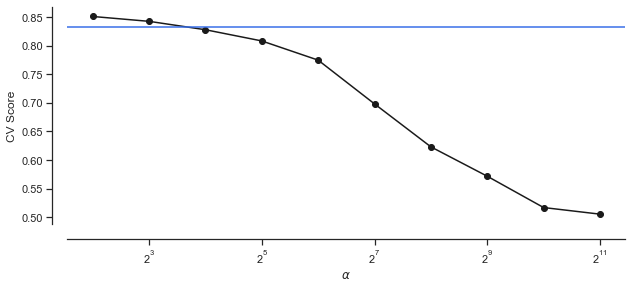

In [23]:
# logarithmic scale: log base 2
# high values to zero-out more variables
alphas = 2. ** np.arange(2, 12)
scores = np.empty_like(alphas)

for i, a in enumerate(alphas):
    lasso = Lasso(random_state = seed)
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)
    
lassocv = LassoCV(cv = 10, random_state = seed)
lassocv.fit(features, target)
lassocv_score = lassocv.score(features, target)
lassocv_alpha = lassocv.alpha_

plt.figure(figsize = (10, 4))
plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color = c)
plt.xlabel(r'$\alpha$')
plt.ylabel('CV Score')
plt.xscale('log', basex = 2)
sns.despine(offset = 15)

print('CV results:', lassocv_score, lassocv_alpha)

It's already a good result: R squared of 0.82. Let's take a look at the features contributing to the model.

Lasso picked 6 features and eliminated the other 60 features.


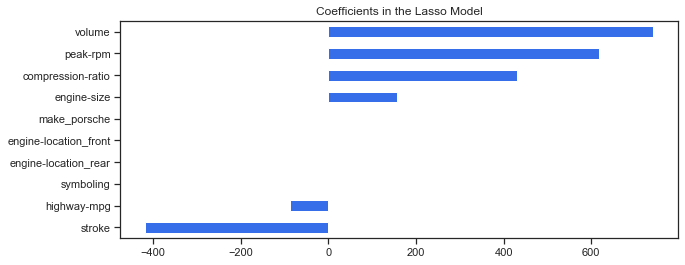

In [24]:
# lassocv coefficients
coefs = pd.Series(lassocv.coef_, index = features.columns)

# prints out the number of picked/eliminated features
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features.")

# takes first and last 10
coefs = pd.concat([coefs.sort_values().head(5), coefs.sort_values().tail(5)])

plt.figure(figsize = (10, 4))
coefs.plot(kind = "barh", color = c)
plt.title("Coefficients in the Lasso Model")
plt.show()

In [25]:
model_l1 = LassoCV(alphas = alphas, cv = 10, random_state = seed).fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)

model_l1.score(X_test, y_test)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5497748.807789564, tolerance: 1005569.1055289255
  tol, rng, random, positive)


0.8277858219151168

We get higher score on the test than on the train set, which shows that the model can propbably __generalize well on the unseen data__.

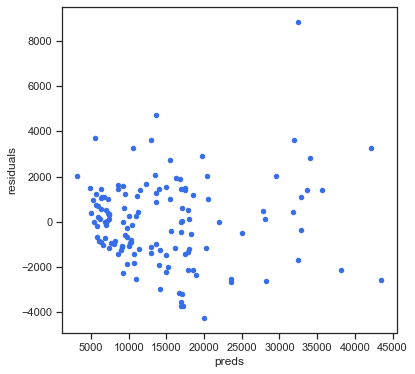

In [26]:
# residual plot
plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds": model_l1.predict(X_train), "true": y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals", kind = "scatter", color = c)

In [27]:
def MSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    print('MSE: %2.3f' % mse)
    return mse

def R2(y_true,y_pred):    
    r2 = r2_score(y_true, y_pred)
    print('R2: %2.3f' % r2)     
    return r2

MSE(y_test, y_pred_l1); R2(y_test, y_pred_l1);

MSE: 3993172.564
R2: 0.828


In [28]:
# predictions
d = {'true' : list(y_test),
     'predicted' : pd.Series(y_pred_l1)
    }

pd.DataFrame(d).head()

,true,predicted
0,8499.0,8503.836069
1,17450.0,17137.224283
2,9279.0,8511.911025
3,7975.0,10935.968247
4,6692.0,6233.718975
